Wiki-Vote

In [1]:
from direct_graph import DirectGraph
from direct_graph import topk
import sys
import matplotlib.pyplot as plt

def Run_LTM(graph, seeds, rounds, centrality):
	v, e = graph.size()
	print("* running LTM({}) TOP {} {} - graph size: {} {}".format(rounds, len(seeds), centrality, v, e))
	influenced, kept, steps = graph.ltm(seeds, rounds)
	print("** influenced(%d) kept(%d) steps(%d)" % (len(influenced), len(kept), steps))
	return len(influenced), len(kept), steps

In [2]:
if __name__ == '__main__':
		
	rounds = 10
	seed = 100
	graph = DirectGraph.from_filename('wiki-Vote.txt')

	print('# Edges = %d\tAverage Clustering = %f' % (graph.countEdges(), graph.average_clustering()))
	sys.stdout.flush()

# Edges = 103689	Average Clustering = 0.121770


In [4]:
    print('# Eigenvector Centrality...')
    diffsum, cscores = graph.eigenvector_centrality()
    # print(diffsum)
    # print(cscores)
    top_eigenc = [a for a, b in topk(cscores, seed)]
    print(top_eigenc)
    print('# Done')
    sys.stdout.flush()

# Eigenvector Centrality...
[766, 2565, 1549, 11, 457, 2688, 1166, 1151, 311, 813, 2485, 1374, 2967, 1133, 988, 1608, 24, 2237, 3352, 789, 173, 2651, 3453, 1305, 993, 2972, 2871, 36, 784, 2326, 2328, 306, 1098, 122, 722, 68, 3026, 1496, 996, 3456, 3032, 1972, 2713, 3641, 3449, 2658, 1210, 3447, 4967, 1319, 310, 879, 3787, 825, 600, 826, 3394, 3028, 2297, 1542, 5079, 4045, 1062, 2653, 2135, 2700, 1922, 1470, 5524, 1395, 2686, 1492, 2842, 2256, 319, 2660, 6, 3454, 312, 3642, 3614, 663, 2674, 2790, 3615, 1055, 1428, 2693, 87, 769, 1808, 432, 4310, 634, 1167, 2145, 72, 5189, 2229, 3010]
# Done


In [5]:
    print('# Betweennes centrality...')
    bet = graph.betweenness()
    # print(bet)
    top_bet = [a for a, b in topk(bet, seed)]
    print(top_bet)
    print('# Done')
    sys.stdout.flush()

# Betweennes centrality...
[2565, 1549, 15, 72, 737, 1166, 5079, 2328, 2237, 28, 993, 3352, 2658, 3456, 8, 5524, 4037, 762, 2398, 2485, 2651, 3976, 4310, 600, 5022, 2871, 825, 1374, 4828, 5179, 1352, 1297, 4099, 1151, 5800, 1305, 789, 6946, 3459, 4712, 56, 2256, 5697, 5543, 407, 2576, 1211, 2654, 1608, 3028, 2940, 6914, 5002, 3453, 2790, 3447, 5189, 5020, 86, 2535, 55, 7092, 6, 633, 5814, 3568, 5254, 1473, 722, 2972, 2323, 4536, 35, 3498, 2285, 3586, 4632, 2660, 4653, 665, 6327, 663, 2120, 3026, 6774, 3631, 1717, 4191, 1496, 1357, 6618, 2145, 5806, 2859, 4483, 2504, 1919, 4335, 3084, 2686]
# Done


In [6]:
	print("# Lin's index...")
	lin = graph.lin_index()
	#print(lin)
	top_lin = [a for a, b in topk(lin, seed)]
	print(top_lin)
	print('# Done')
	sys.stdout.flush()

# Lin's index...
[4037, 15, 2398, 1549, 2535, 3089, 762, 5412, 2565, 5254, 1297, 737, 4191, 3352, 3456, 7632, 2625, 4335, 2066, 3334, 3084, 3897, 7620, 2328, 4712, 3459, 4735, 2576, 4875, 1026, 7553, 3537, 6832, 5524, 4099, 4536, 2516, 5210, 5459, 5233, 3005, 5079, 3976, 5484, 5022, 3443, 3117, 3238, 5543, 8293, 1385, 4666, 2871, 3643, 72, 5002, 7809, 5288, 7092, 2790, 6634, 2958, 2485, 3291, 1633, 4400, 4310, 1982, 5449, 2381, 2651, 8294, 2657, 4256, 6560, 4828, 3755, 2774, 2145, 2144, 1211, 5404, 1166, 2653, 2210, 2297, 2775, 214, 3568, 5178, 3796, 5697, 2654, 6327, 7699, 2660, 8295, 4247, 3498, 204]
# Done


In [7]:
	lin_max_values = []
	eigenc_max_values = []
	bet_max_values = []

	
	for i in range(100):
		seed = 100
		max_lin_influenced = Run_LTM(graph, top_lin[:seed], rounds, 'Lin')[0]
		max_eigenc_influenced = Run_LTM(graph, top_eigenc[:seed], rounds, 'Eigenvector')[0]
		max_bet_influenced = Run_LTM(graph, top_bet[:seed], rounds, 'Betweenness')[0]
		lin_max_seed = seed
		eigenc_max_seed = seed
		bet_max_seed = seed

* running LTM(10) TOP 100 Lin - graph size: 7115 103689
** influenced(4088) kept(3027) steps(5)
* running LTM(10) TOP 100 Eigenvector - graph size: 7115 103689
** influenced(3859) kept(3256) steps(6)
* running LTM(10) TOP 100 Betweenness - graph size: 7115 103689
** influenced(3905) kept(3210) steps(5)
* running LTM(10) TOP 100 Lin - graph size: 7115 103689
** influenced(4182) kept(2933) steps(5)
* running LTM(10) TOP 100 Eigenvector - graph size: 7115 103689
** influenced(4006) kept(3109) steps(5)
* running LTM(10) TOP 100 Betweenness - graph size: 7115 103689
** influenced(3935) kept(3180) steps(5)
* running LTM(10) TOP 100 Lin - graph size: 7115 103689
** influenced(4156) kept(2959) steps(5)
* running LTM(10) TOP 100 Eigenvector - graph size: 7115 103689
** influenced(3960) kept(3155) steps(6)
* running LTM(10) TOP 100 Betweenness - graph size: 7115 103689
** influenced(3919) kept(3196) steps(6)
* running LTM(10) TOP 100 Lin - graph size: 7115 103689
** influenced(4063) kept(3052) s

In [8]:
		while seed > 0:
			seed -= 5
			influenced_lin = Run_LTM(graph, top_lin[:seed], rounds, 'Lin')[0]
			if max_lin_influenced <= influenced_lin:
				max_lin_influenced = influenced_lin
				lin_max_seed = seed
			else:
				break

* running LTM(10) TOP 95 Lin - graph size: 7115 103689
** influenced(3962) kept(3153) steps(5)


In [9]:
		seed = 100
		while seed > 0:
			seed -= 5
			influenced_eigenc = Run_LTM(graph, top_eigenc[:seed], rounds, 'Eigenvector')[0]
			if max_eigenc_influenced <= influenced_eigenc:
				max_eigenc_influenced = influenced_eigenc
				eigenc_max_seed = seed
			else:
				break

* running LTM(10) TOP 95 Eigenvector - graph size: 7115 103689
** influenced(3909) kept(3206) steps(6)


In [10]:
		seed = 100
		while seed > 0:
			seed -= 5
			influenced_bet = Run_LTM(graph, top_bet[:seed], rounds, 'Betweenness')[0]
			if max_bet_influenced <= influenced_bet:
				max_bet_influenced = influenced_bet
				bet_max_seed = seed
			else:
				break

* running LTM(10) TOP 95 Betweenness - graph size: 7115 103689
** influenced(3975) kept(3140) steps(5)
* running LTM(10) TOP 90 Betweenness - graph size: 7115 103689
** influenced(3920) kept(3195) steps(5)


In [11]:
		lin_max_values.append((lin_max_seed, max_lin_influenced))
		eigenc_max_values.append((eigenc_max_seed, max_eigenc_influenced))
		bet_max_values.append((bet_max_seed, max_bet_influenced))
        sys.stdout.flush()

In [12]:
    print('# Lin\tEigenvector\tBetweenness')
    for x, y, z in zip(lin_max_values, eigenc_max_values, bet_max_values):
        print("{}-{} {}-{} {}-{}".format(x[0], x[1], y[0], y[1], z[0], z[1]))

    sys.stdout.flush()

# Lin	Eigenvector	Betweenness
100-4222 100-3948 95-3975


In [13]:
%matplotlib inline

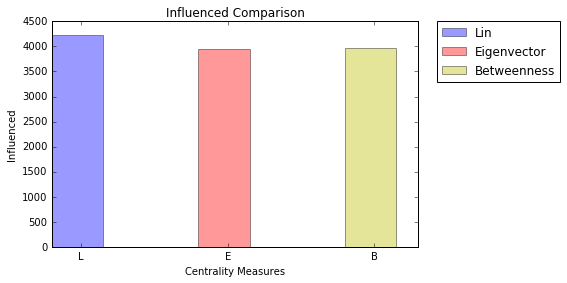

In [16]:
    fig, ax = plt.subplots()

    bar_width = 0.35

    opacity = 0.4

    rects1 = plt.bar(1, max_lin_influenced, width=bar_width, alpha=opacity, color='b', label='Lin')

    rects2 = plt.bar(2, max_eigenc_influenced, width=bar_width, alpha=opacity, color='r', label='Eigenvector')

    rects3 = plt.bar(3, max_bet_influenced, width=bar_width, alpha=opacity, color='y', label='Betweenness')

    plt.xlabel('Centrality Measures')
    plt.ylabel('Influenced')
    plt.title('Influenced Comparison')
    plt.xticks([1.2,2.2,3.2], ('L', 'E', 'B'))

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.tight_layout()

    plt.savefig('wikivote.png')
    plt.show()